## Import Libraries

In [108]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset And Get Info


In [109]:
df = pd.read_csv('heart_expanded2.csv')
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1273,62,M,ASY,145,0,1,ST,78,N,2.1,Flat,1
844,52,M,TA,118,186,0,LVH,190,N,0.0,Flat,0
1050,61,M,TA,141,200,1,ST,100,N,1.5,Down,1
986,52,M,ASY,163,0,1,Normal,123,Y,1.0,Up,1
1548,59,M,ASY,122,0,1,ST,130,Y,1.2,Down,1


In [110]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 1820
Number of Columns : 12


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1820 non-null   int64  
 1   Sex             1820 non-null   object 
 2   ChestPainType   1820 non-null   object 
 3   RestingBP       1820 non-null   int64  
 4   Cholesterol     1820 non-null   int64  
 5   FastingBS       1820 non-null   int64  
 6   RestingECG      1820 non-null   object 
 7   MaxHR           1820 non-null   int64  
 8   ExerciseAngina  1820 non-null   object 
 9   Oldpeak         1820 non-null   float64
 10  ST_Slope        1820 non-null   object 
 11  HeartDisease    1820 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 170.8+ KB


In [112]:
# Check NaN Value
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [113]:
# Describe Numiric Data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,54.812088,132.842857,185.955495,0.283516,131.789011,1.082363,0.774725
std,8.861581,17.874848,115.795282,0.450829,24.180885,1.081110,0.417878
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,49.000000,120.000000,126.750000,0.000000,116.000000,0.000000,1.000000
50%,56.000000,131.000000,221.000000,0.000000,130.000000,1.000000,1.000000
75%,61.000000,142.000000,261.250000,1.000000,150.000000,1.800000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


####    All this an errors in data collection
- the min value in  2 columns = 0 (RestingBP, Cholesterol) is not realistic
- An Oldpeak value of -2.6 mm is not realistic because ST depression (Oldpeak) cannot be negative

In [114]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Age,1820,0,0.0,50
Sex,1820,0,0.0,2
ChestPainType,1820,0,0.0,4
RestingBP,1820,0,0.0,100
Cholesterol,1820,0,0.0,253
FastingBS,1820,0,0.0,2
RestingECG,1820,0,0.0,3
MaxHR,1820,0,0.0,127
ExerciseAngina,1820,0,0.0,2
Oldpeak,1820,0,0.0,67


In [115]:
# Check Dublication
df.duplicated().sum()

np.int64(49)

## Handling Missing Data (Nulls)

**Handle not realistic value (RestingBP, Cholesterol,Oldpeak)**

The negative reviews are real but were entered incorrectly because Oldpeak should be positive

In [116]:
print((df['Oldpeak'] < 0).sum())


28


In [117]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


There are 13 neg value. we will change it to pos

In [118]:
# Change negative values to positive values
df['Oldpeak'] = df['Oldpeak'].abs()

Convert those 0's values in these 2 columns (RestingBP, Cholesterol) to determine how many missing valuesin each feature in our data

In [119]:
df[['RestingBP','Cholesterol']] = df[['RestingBP','Cholesterol']].replace(0,np.nan)

In [120]:
# Show Number of Missing Values (NaN)
df[['RestingBP','Cholesterol']].isna().sum()

RestingBP        1
Cholesterol    438
dtype: int64

Show Status of HeartDisease which NaN in RestingBP

In [121]:
df[df['RestingBP'].isna()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,NaN,NaN,0,Normal,155,N,1.5,Flat,1


Fill Missing Value with median of people has Heart Disease

In [122]:
df['RestingBP'] = df['RestingBP'].fillna(df.groupby('HeartDisease')['RestingBP'].median()[1])

In [123]:
temp = df.groupby('HeartDisease')['Cholesterol'].median()
temp

HeartDisease
0    231.5
1    242.0
Name: Cholesterol, dtype: float64

In [124]:
df.loc[(df['Cholesterol'].isna()) & (df['HeartDisease'] == 0), 'Cholesterol'] = temp[0]
df.loc[(df['Cholesterol'].isna()) & (df['HeartDisease'] == 1), 'Cholesterol'] = temp[1]

In [125]:
# After Fill Missing Values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Detection Outliers

In [126]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

In [127]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

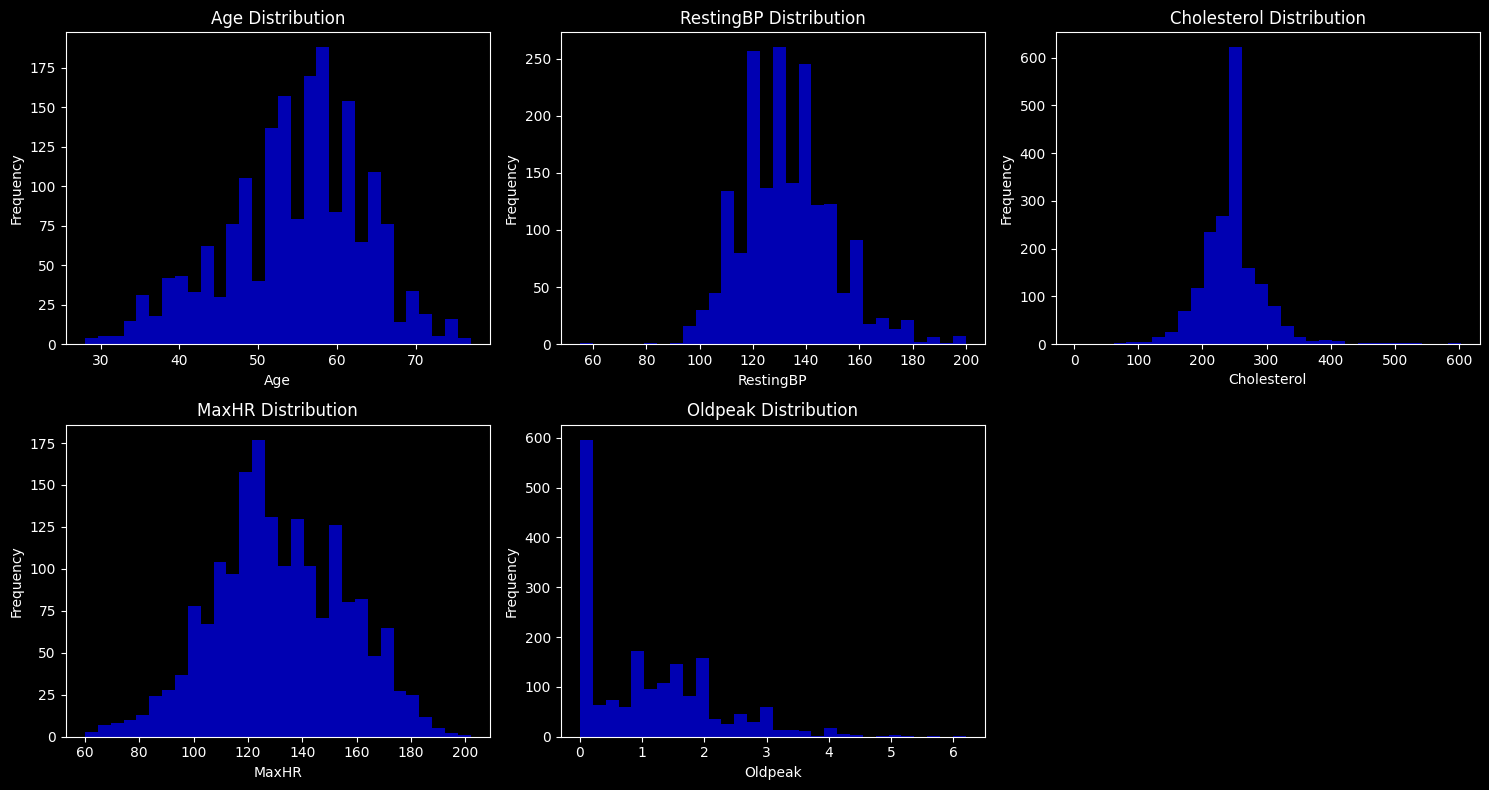

In [128]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There are outliers in oldpeak and Cholesterol columns. we will drop them.

In [129]:
outliers_iqr = detect_outliers_iqr(df, ['Oldpeak', 'Cholesterol'], threshold=1.5)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Oldpeak: 9 outliers detected
Cholesterol: 133 outliers detected


In [130]:
def remove_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers(df, numerical_columns)

In [131]:
# The New of Shape Cleaned Data
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")

Number of Row : 1621
Number of Columns : 12


#### Cleaned Data BoxPlot To Show Outliers

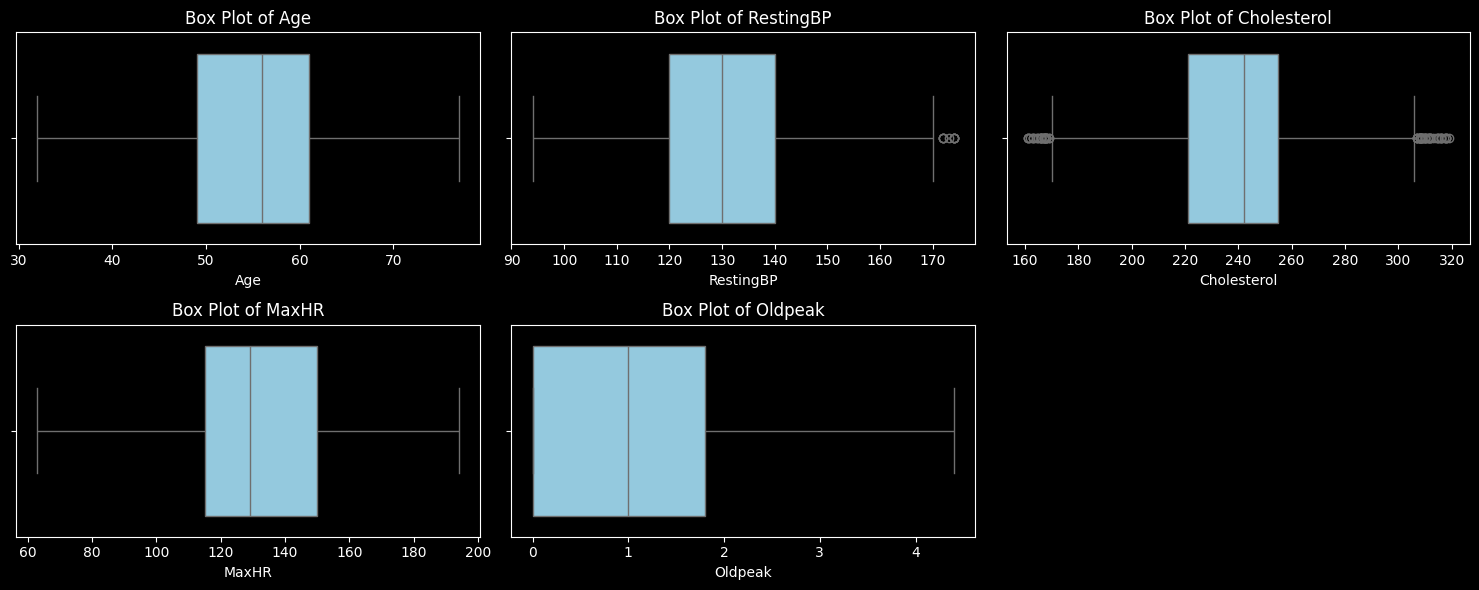

In [132]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [133]:
df_cleaned.reset_index(inplace = True , drop = True)
df_cleaned.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
617,64,F,NAP,140.0,313.0,0,Normal,133,N,0.2,Up,0
1275,63,M,ASY,110.0,253.0,0,ST,142,Y,1.9,Flat,1
564,48,M,ASY,122.0,222.0,0,LVH,186,N,0.0,Up,0
1321,34,M,ASY,111.0,219.0,0,Normal,139,Y,1.3,Flat,1
886,36,M,ASY,110.0,242.0,1,Normal,125,Y,1.0,Flat,1


In [134]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1621 non-null   int64  
 1   Sex             1621 non-null   object 
 2   ChestPainType   1621 non-null   object 
 3   RestingBP       1621 non-null   float64
 4   Cholesterol     1621 non-null   float64
 5   FastingBS       1621 non-null   int64  
 6   RestingECG      1621 non-null   object 
 7   MaxHR           1621 non-null   int64  
 8   ExerciseAngina  1621 non-null   object 
 9   Oldpeak         1621 non-null   float64
 10  ST_Slope        1621 non-null   object 
 11  HeartDisease    1621 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 152.1+ KB


## EDA of Data and Get Insights

**Age distribution**

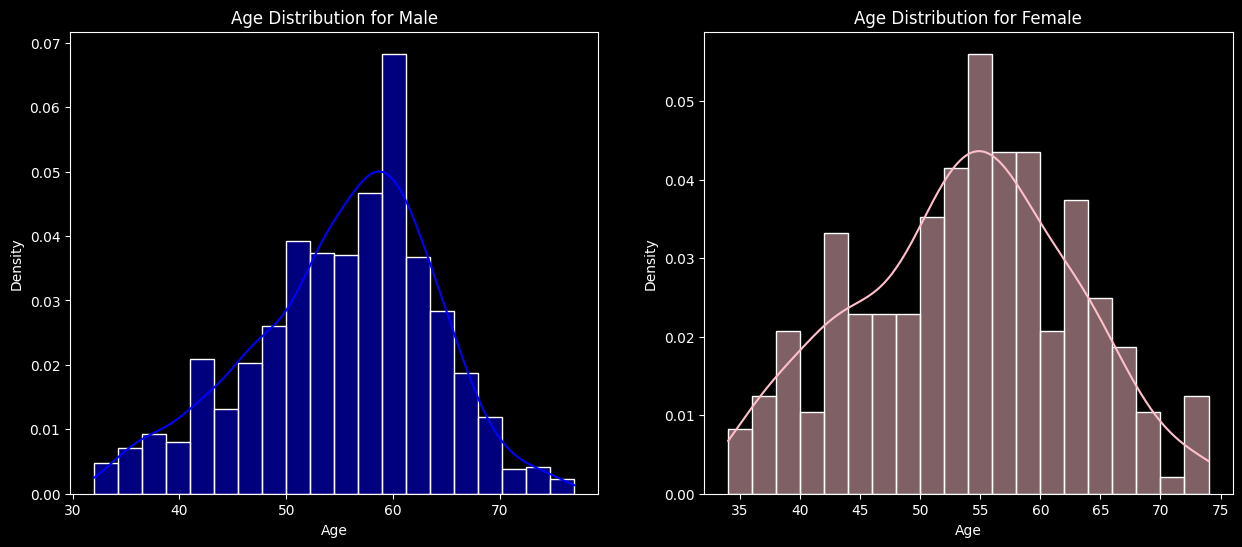

In [135]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df_cleaned[df['Sex'] == 'M']['Age'], color='blue', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Male')

plt.subplot(1,2,2)
sns.histplot(df_cleaned[df['Sex'] == 'F']['Age'], color='pink', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Female')

plt.show()

- Most Ranges of Age between 50 to 60 

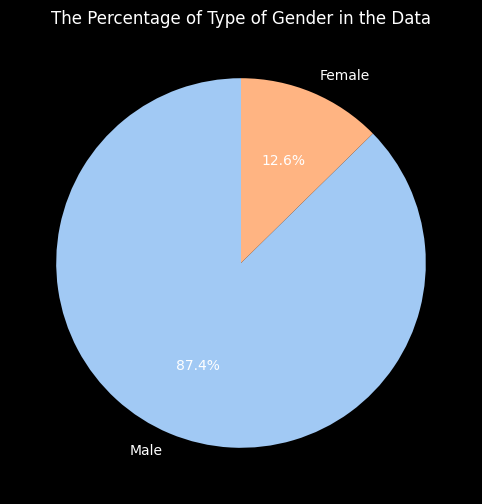

In [136]:
gender_counts = df_cleaned['Sex'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, 
        labels=['Male', 'Female'], 
        autopct='%.1f%%',
        colors=sns.color_palette('pastel'),
        startangle=90)

plt.title('The Percentage of Type of Gender in the Data')
plt.show()

- Males are the dominant Category in the data

## Chest Pain Type For each gender of Sex

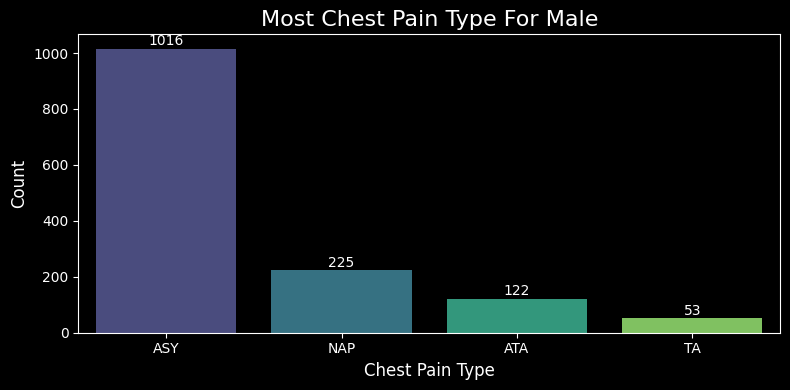

In [137]:
male_data = df_cleaned[df_cleaned['Sex'] == 'M']
chest_pain_counts = male_data['ChestPainType'].value_counts()

# Create bar plot with Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=chest_pain_counts.index, 
            y=chest_pain_counts.values,
            palette='viridis')

# Add title and labels
plt.title('Most Chest Pain Type For Male', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of bars
for i, count in enumerate(chest_pain_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

# Dark theme styling
plt.style.use('dark_background')
sns.set_palette('viridis')

plt.tight_layout()

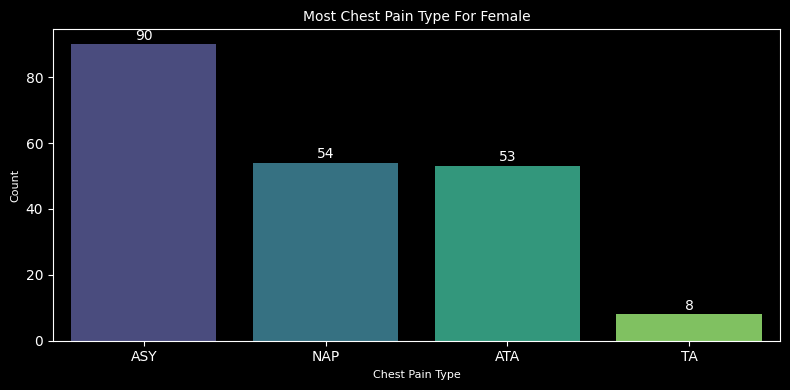

In [138]:
male_data = df_cleaned[df_cleaned['Sex'] == 'F']
chest_pain_counts = male_data['ChestPainType'].value_counts()

# Create bar plot with Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=chest_pain_counts.index, 
            y=chest_pain_counts.values,
            palette='viridis')

# Add title and labels
plt.title('Most Chest Pain Type For Female', fontsize=10)
plt.xlabel('Chest Pain Type', fontsize=8)
plt.ylabel('Count', fontsize=8)

# Add count labels on top of bars
for i, count in enumerate(chest_pain_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

# Dark theme styling
plt.style.use('dark_background')
sns.set_palette('viridis')

plt.tight_layout()

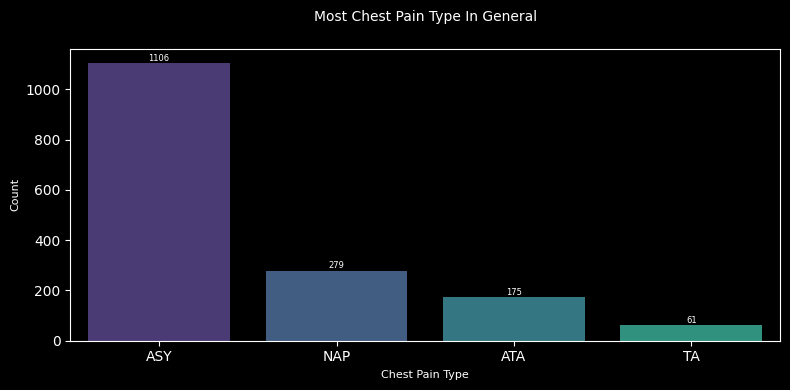

In [139]:
chest_pain_counts = df_cleaned['ChestPainType'].value_counts()

plt.figure(figsize=(8, 4))

ax = sns.barplot(x=chest_pain_counts.index, 
                 y=chest_pain_counts.values,
                 hue=chest_pain_counts.index)  # Color by category

plt.title('Most Chest Pain Type In General', fontsize=10, pad=20)
plt.xlabel('Chest Pain Type', fontsize=8)
plt.ylabel('Count', fontsize=8)

for i, count in enumerate(chest_pain_counts.values):
    ax.text(i, count + 0.5, str(count), 
            ha='center', va='bottom',
            fontsize=6)

plt.tight_layout()
plt.show()

#### Most Chest Pain Type 
- Male and Female Most Common occur -> ASY: Asymptomatic
- Male and Female Least Common occur -> TA: Typical Angina

## Distribution of Resting Blood Pressure 

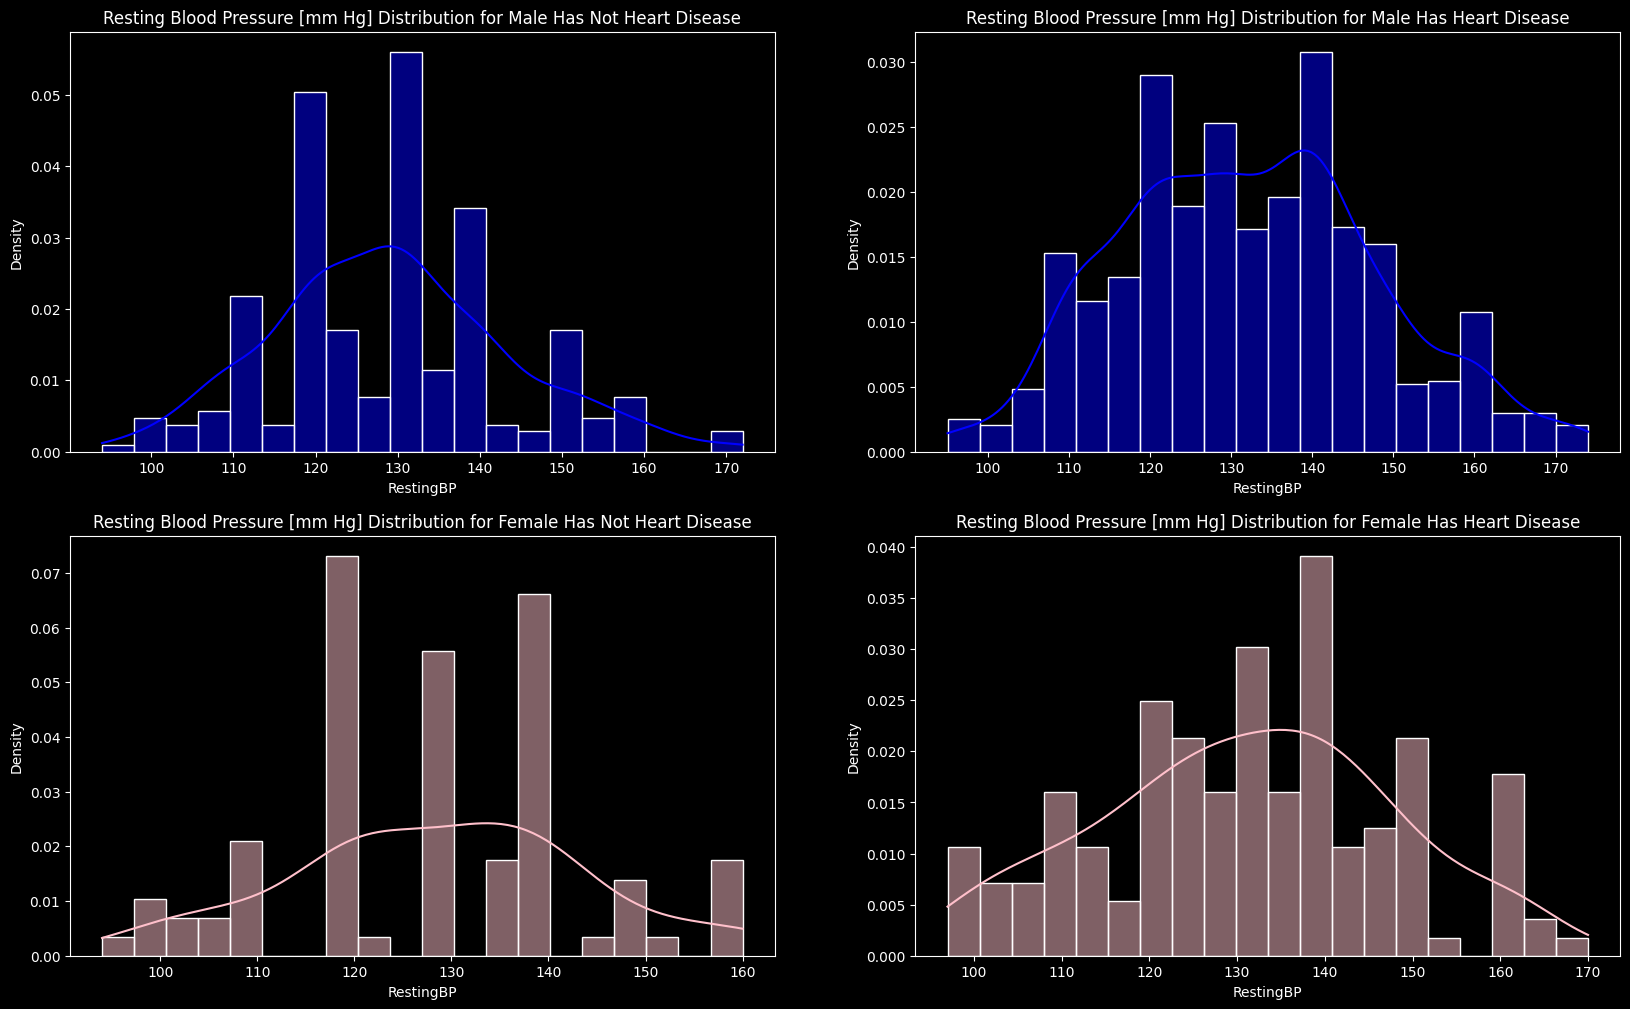

In [140]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 0)]['RestingBP'], color='blue', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution for Male Has Not Heart Disease')

plt.subplot(2,2,2)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 1)]['RestingBP'], color='blue', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution for Male Has Heart Disease')

plt.subplot(2,2,3)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 0)]['RestingBP'], color='pink', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution for Female Has Not Heart Disease')

plt.subplot(2,2,4)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 1)]['RestingBP'], color='pink', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution for Female Has Heart Disease')

plt.show()

## Distribution of Cholesterol

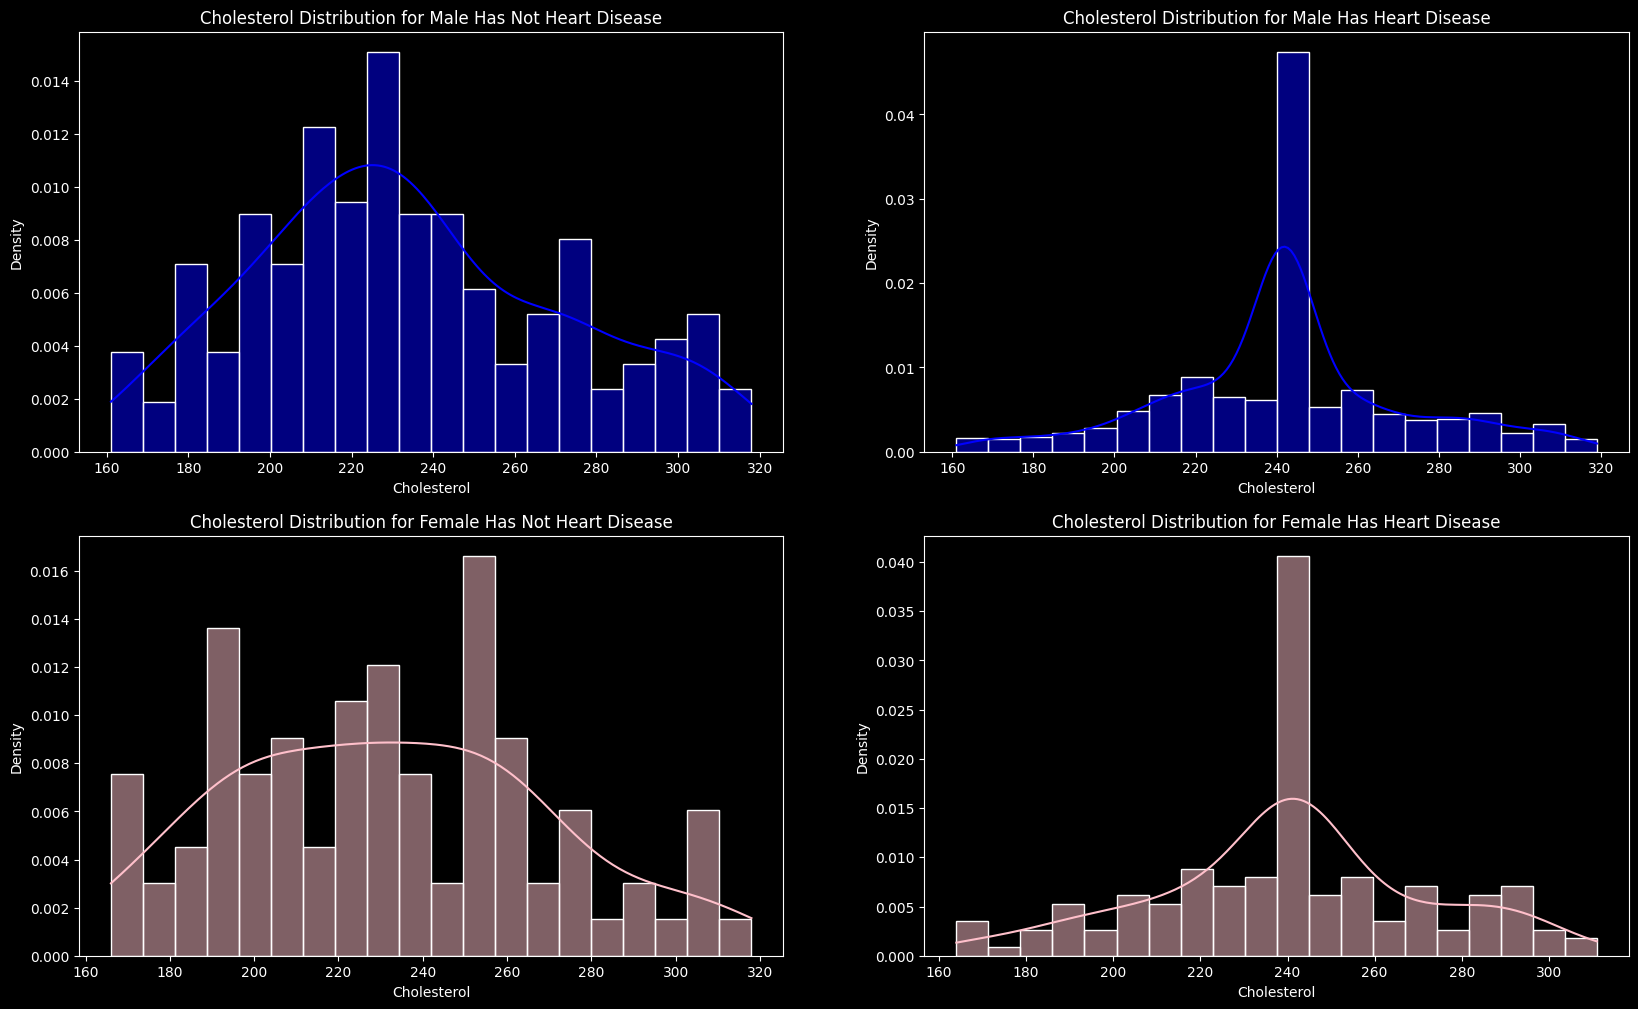

In [141]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 0)]['Cholesterol'], color='blue', kde=True, bins=20, stat='density')
plt.title('Cholesterol Distribution for Male Has Not Heart Disease')

plt.subplot(2,2,2)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 1)]['Cholesterol'], color='blue', kde=True, bins=20, stat='density')
plt.title('Cholesterol Distribution for Male Has Heart Disease')

plt.subplot(2,2,3)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 0)]['Cholesterol'], color='pink', kde=True, bins=20, stat='density')
plt.title('Cholesterol Distribution for Female Has Not Heart Disease')

plt.subplot(2,2,4)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 1)]['Cholesterol'], color='pink', kde=True, bins=20, stat='density')
plt.title('Cholesterol Distribution for Female Has Heart Disease')

plt.show()

Percentage of fasting For people has heart disease or not

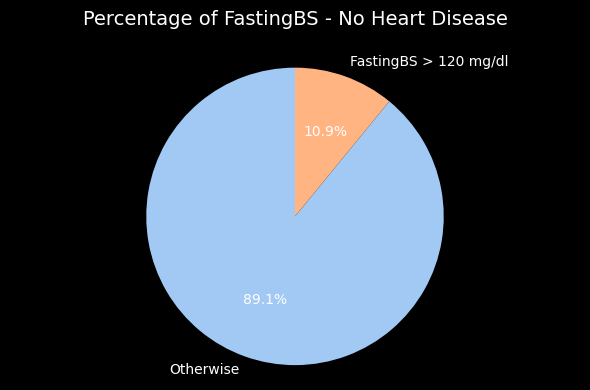

In [142]:
no_heart_disease = df_cleaned[df_cleaned['HeartDisease'] == 0]
fasting_counts = no_heart_disease['FastingBS'].value_counts()

labels = ['Otherwise', 'FastingBS > 120 mg/dl']
colors = sns.color_palette('pastel')[0:2]  # Light colors for the pie chart


# Create pie chart
plt.figure(figsize=(6, 4))
plt.pie(
    fasting_counts,
    labels=labels,
    autopct='%1.1f%%',  
    colors=colors,
    startangle=90,
    textprops={'color': 'white'}  
)

# Add title
plt.title('Percentage of FastingBS - No Heart Disease', 
          pad=20, fontsize=14, color='white')

plt.axis('equal')  

plt.tight_layout()
plt.show()

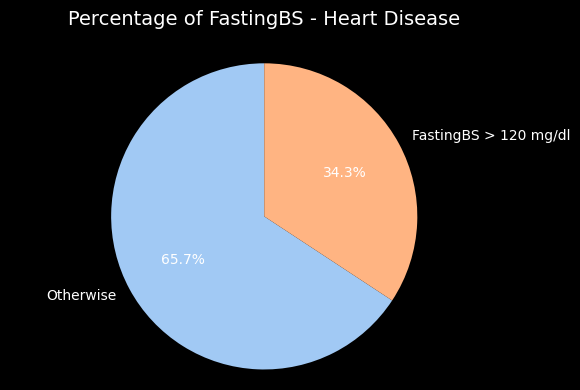

In [143]:
no_heart_disease = df_cleaned[df_cleaned['HeartDisease'] == 1]
fasting_counts = no_heart_disease['FastingBS'].value_counts()

labels = ['Otherwise', 'FastingBS > 120 mg/dl']
colors = sns.color_palette('pastel')[0:2]  # Light colors for the pie chart


# Create pie chart
plt.figure(figsize=(6, 4))
plt.pie(
    fasting_counts,
    labels=labels,
    autopct='%1.1f%%',  
    colors=colors,
    startangle=90,
    textprops={'color': 'white'}  
)

# Add title
plt.title('Percentage of FastingBS - Heart Disease', 
          pad=20, fontsize=14, color='white')

plt.axis('equal')  

plt.tight_layout()
plt.show()

- A higher rate of fasting affects the appearance of heart disease in people

Distribution of Maximum Heart Rate Achieved (MaxHR)

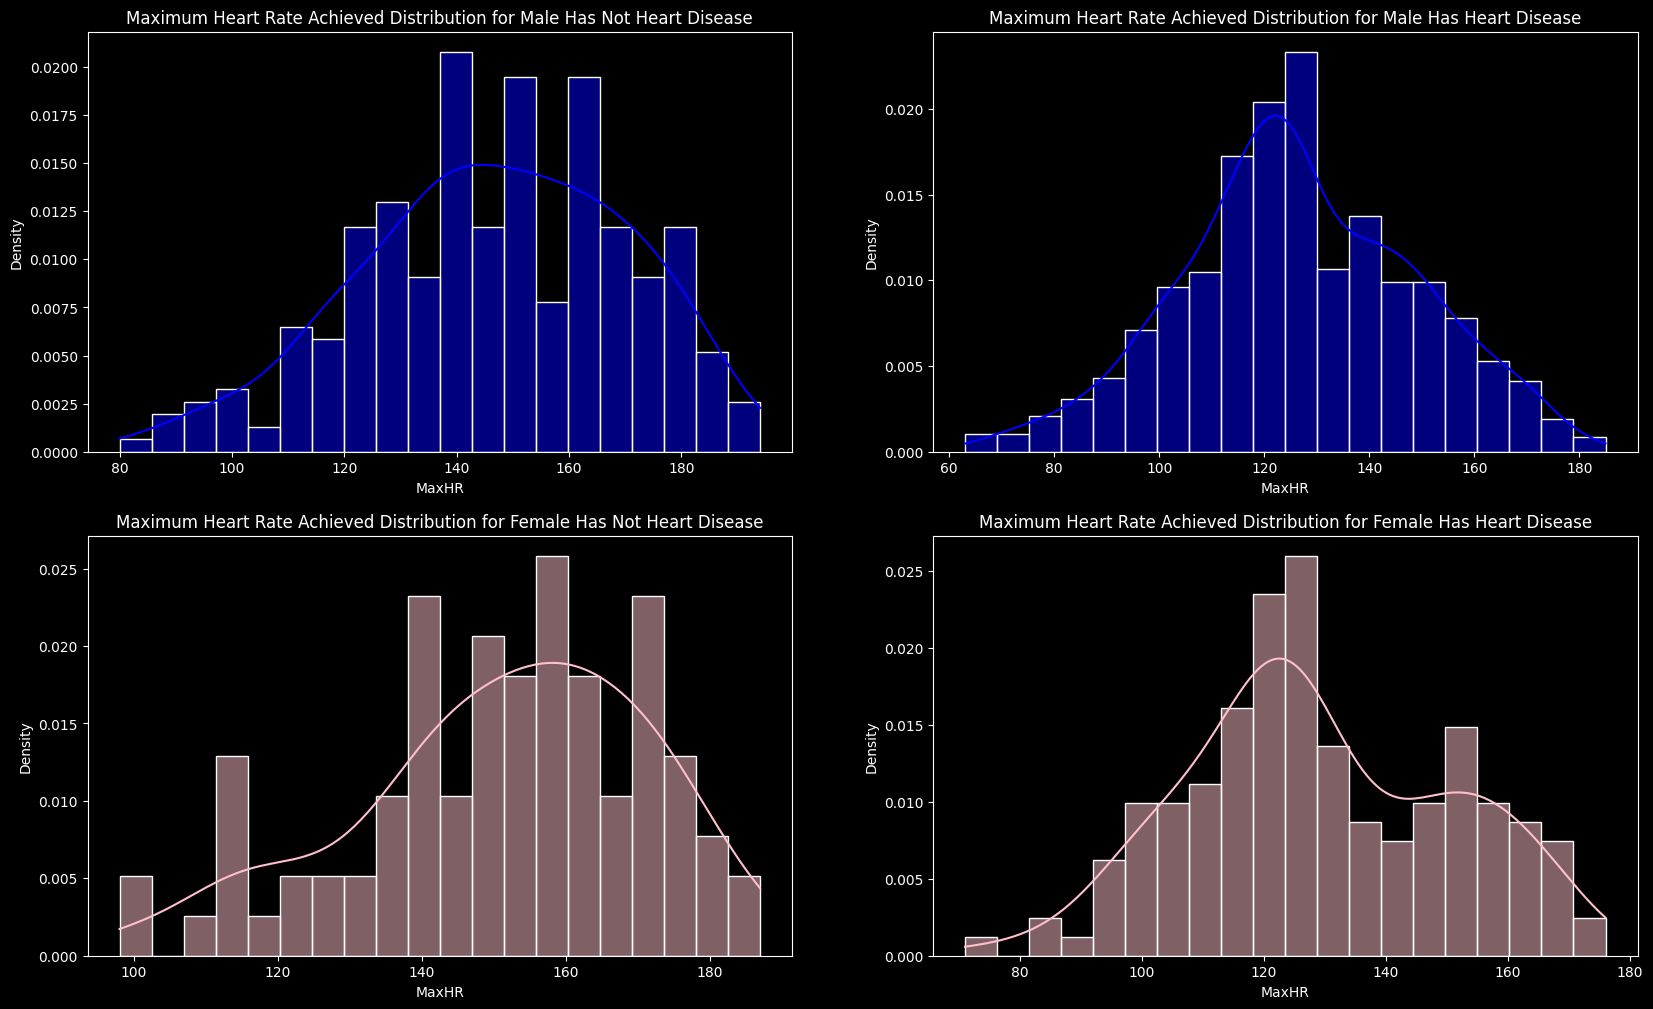

In [144]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 0)]['MaxHR'], color='blue', kde=True, bins=20, stat='density')
plt.title('Maximum Heart Rate Achieved Distribution for Male Has Not Heart Disease')

plt.subplot(2,2,2)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 1)]['MaxHR'], color='blue', kde=True, bins=20, stat='density')
plt.title('Maximum Heart Rate Achieved Distribution for Male Has Heart Disease')

plt.subplot(2,2,3)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 0)]['MaxHR'], color='pink', kde=True, bins=20, stat='density')
plt.title('Maximum Heart Rate Achieved Distribution for Female Has Not Heart Disease')

plt.subplot(2,2,4)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 1)]['MaxHR'], color='pink', kde=True, bins=20, stat='density')
plt.title('Maximum Heart Rate Achieved Distribution for Female Has Heart Disease')

plt.show()

Oldpeak for people has Heart Disease or not

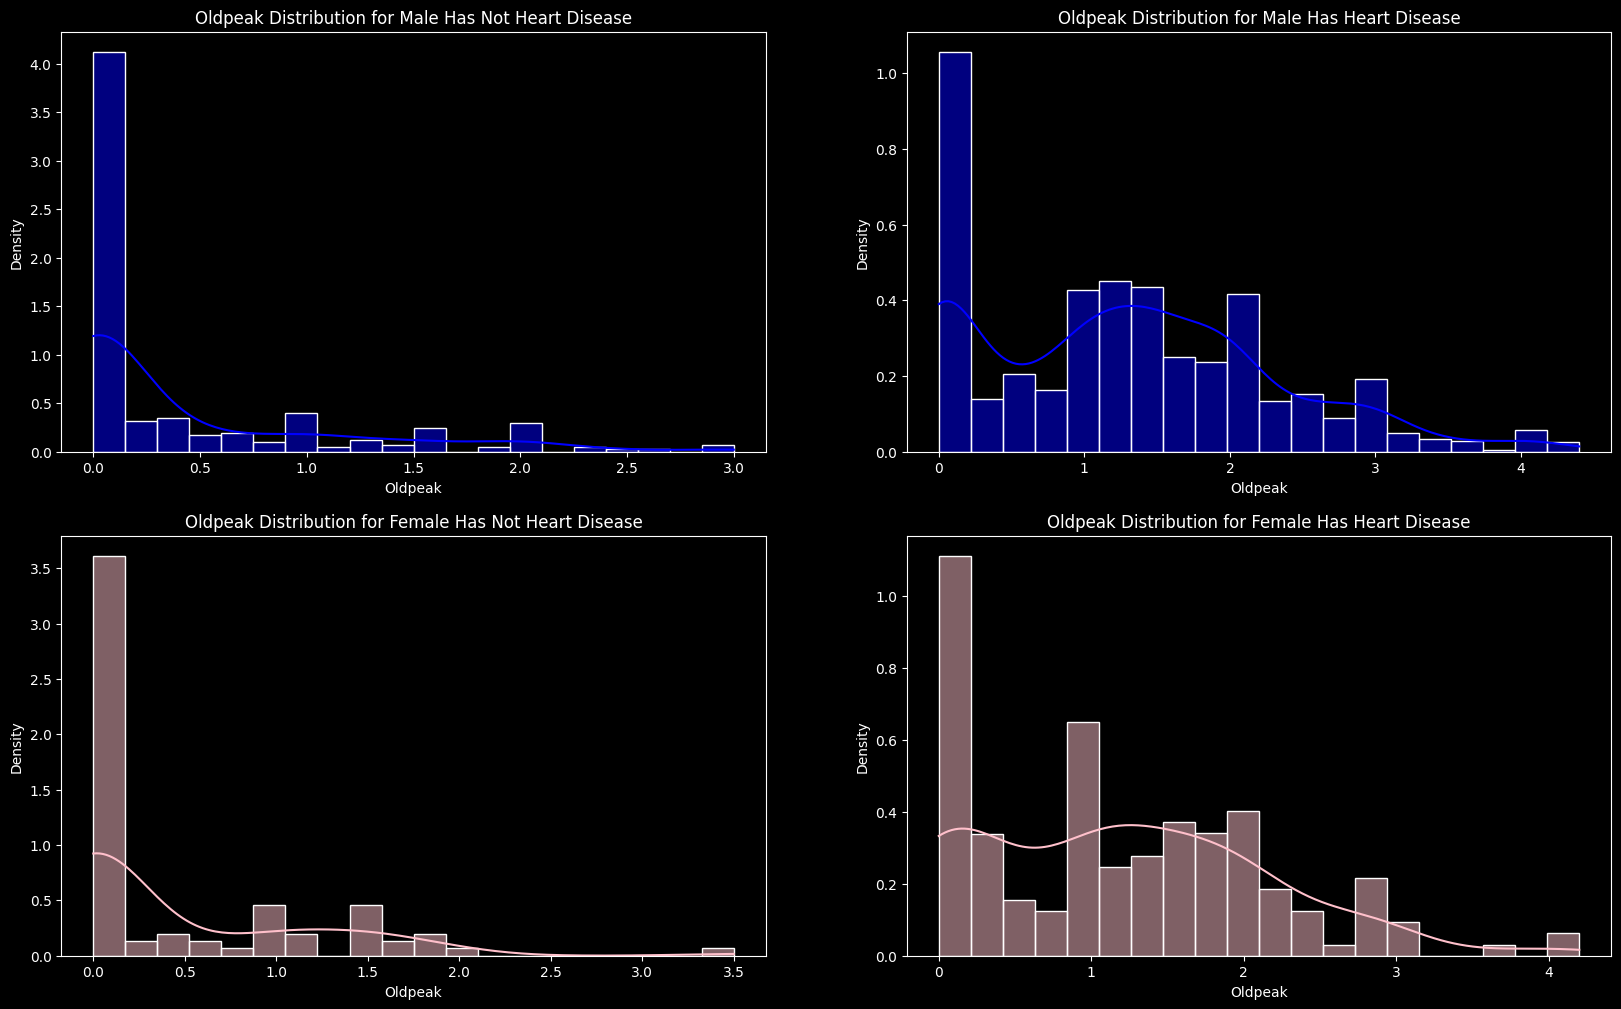

In [145]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 0)]['Oldpeak'], color='blue', kde=True, bins=20, stat='density')
plt.title('Oldpeak Distribution for Male Has Not Heart Disease')

plt.subplot(2,2,2)

sns.histplot(df_cleaned[(df['Sex'] == 'M') & (df_cleaned['HeartDisease'] == 1)]['Oldpeak'], color='blue', kde=True, bins=20, stat='density')
plt.title('Oldpeak Distribution for Male Has Heart Disease')

plt.subplot(2,2,3)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 0)]['Oldpeak'], color='pink', kde=True, bins=20, stat='density')
plt.title('Oldpeak Distribution for Female Has Not Heart Disease')

plt.subplot(2,2,4)

sns.histplot(df_cleaned[(df['Sex'] == 'F') & (df_cleaned['HeartDisease'] == 1)]['Oldpeak'], color='pink', kde=True, bins=20, stat='density')
plt.title('Oldpeak Distribution for Female Has Heart Disease')

plt.show()

- Higher Oldpeak values are strongly correlated with the presence of Heart Disease, indicating more severe heart ischemia or coronary artery disease.

## Total Insights
- Most Ranges of Age between 50 to 60 
- Males are the dominant Category in the data
- Male and Female Most Common occur -> ASY: Asymptomatic
- Male and Female Least Common occur -> TA: Typical Angina
- A higher rate of fasting affects the appearance of heart disease in people
- Higher Oldpeak values are strongly correlated with the presence of Heart Disease, indicating more severe heart ischemia or coronary artery disease.


## Data Preprocessing

#### Handling Object DataType

In [146]:
column_to_encode = df.select_dtypes(object).columns.tolist()
le = LabelEncoder()
for column in column_to_encode:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

In [147]:
# Show Data After some of Encode
df_cleaned.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,2,0


In [148]:
# Final Info after Encode
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1621 non-null   int64  
 1   Sex             1621 non-null   int64  
 2   ChestPainType   1621 non-null   int64  
 3   RestingBP       1621 non-null   float64
 4   Cholesterol     1621 non-null   float64
 5   FastingBS       1621 non-null   int64  
 6   RestingECG      1621 non-null   int64  
 7   MaxHR           1621 non-null   int64  
 8   ExerciseAngina  1621 non-null   int64  
 9   Oldpeak         1621 non-null   float64
 10  ST_Slope        1621 non-null   int64  
 11  HeartDisease    1621 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 152.1 KB


#### Assign feature and target variables

In [149]:
X = df_cleaned.drop('HeartDisease' , axis = 1)
y = df_cleaned['HeartDisease']

#### Splitting Data 

In [150]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 44 , shuffle = True)

In [151]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (1296, 11)
Shape of X_Test (325, 11)
Shape of Y_Train (1296,)
Shape of Y_Test (325,)


## Modeling

#### Use Different Models Algorithm

In [152]:
def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

#### 1. Logistic Regression

In [153]:
lr = LogisticRegression()
Kfold(lr, "Logistic Regression")
train(lr, "Logistic Regression")

Logistic Regression score on cross validation: 89.81935923653715%
Logistic Regression model score on Training data: 91.12654320987654%
Logistic Regression model score on Testing data: 88.0%


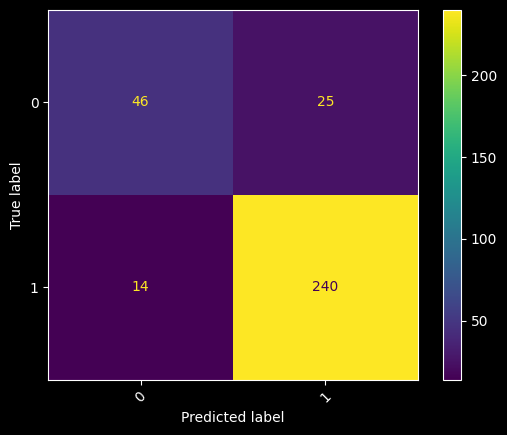

In [154]:
ConfusionMatrixDisplay.from_estimator(lr,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [155]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.77      0.65      0.70        71
           1       0.91      0.94      0.92       254

    accuracy                           0.88       325
   macro avg       0.84      0.80      0.81       325
weighted avg       0.88      0.88      0.88       325



#### 2. Random Forest

In [156]:
rf = RandomForestClassifier(n_estimators = 100 , max_depth = 50)
Kfold(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 93.5211694311899%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 92.3076923076923%


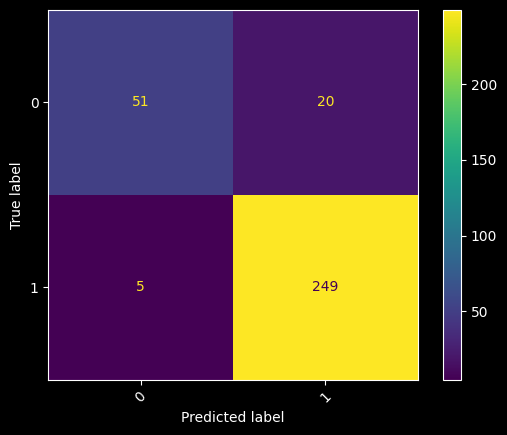

In [157]:
ConfusionMatrixDisplay.from_estimator(rf,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [158]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80        71
           1       0.93      0.98      0.95       254

    accuracy                           0.92       325
   macro avg       0.92      0.85      0.88       325
weighted avg       0.92      0.92      0.92       325



#### 3. KNN

In [159]:
knn = KNeighborsClassifier()
Kfold(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 79.4558054987503%
KNN model score on Training data: 84.72222222222221%
KNN model score on Testing data: 80.3076923076923%


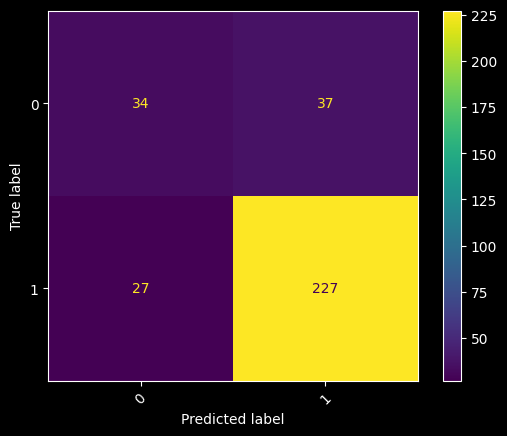

In [160]:
ConfusionMatrixDisplay.from_estimator(knn,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [161]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.56      0.48      0.52        71
           1       0.86      0.89      0.88       254

    accuracy                           0.80       325
   macro avg       0.71      0.69      0.70       325
weighted avg       0.79      0.80      0.80       325



#### 4. Decision Tree

In [162]:
dt_model = DecisionTreeClassifier()
Kfold(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 90.56047867908809%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 91.07692307692308%


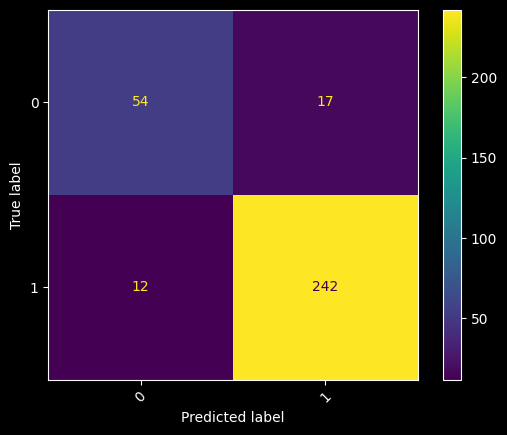

In [163]:
ConfusionMatrixDisplay.from_estimator(dt_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [164]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        71
           1       0.93      0.95      0.94       254

    accuracy                           0.91       325
   macro avg       0.88      0.86      0.87       325
weighted avg       0.91      0.91      0.91       325



#### Xgboost

In [165]:
xgboost = model = XGBClassifier(objective = "binary:logistic" , subsample = 0.7 , min_child_weight = 3,
                                max_depth = 3 , learning_rate = 0.1 , gamma = 0 , colsample_bytree = 0.5,)
Kfold(xgboost, "Xgboost")
train(xgboost, "Xgboost")

Xgboost score on cross validation: 92.7190789971976%
Xgboost model score on Training data: 94.98456790123457%
Xgboost model score on Testing data: 91.38461538461539%


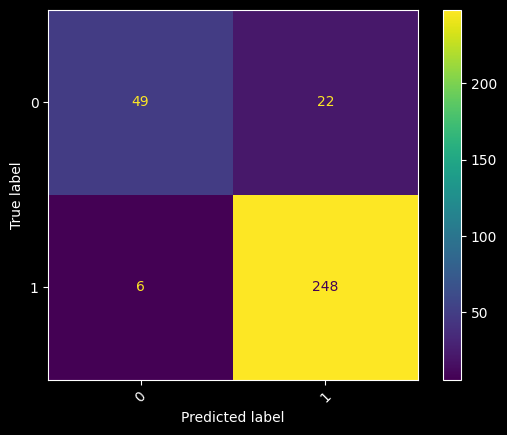

In [166]:
ConfusionMatrixDisplay.from_estimator(xgboost,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [167]:
class_report(xgboost)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78        71
           1       0.92      0.98      0.95       254

    accuracy                           0.91       325
   macro avg       0.90      0.83      0.86       325
weighted avg       0.91      0.91      0.91       325



- Best Model is RandomForestClassifier with recall 90.0%

## Save Xgboost Model 

In [168]:
joblib.dump(xgboost,'xgboost_model.sav')

['xgboost_model.sav']

In [169]:
joblib.dump(rf,'rf.sav')

['rf.sav']